# Data Science Lunch and Learn: Classification models using Python and scikit-learn

https://www.crowdcast.io/e/data-science-lunch-and-4/register

By IBM Developer Europe

Classification belongs to a category of supervised Machine learning. Classification is when the feature to be predicted contains categories of values. Each of these categories is considered as a class into which the predicted value falls and hence has its name, classification.

In this workshop, we do a detailed study of the different classification algorithms using scikit-learn and apply it to the same data set for the sake of comparison.

We will run a Jupyter notebook in Watson Studio. If you want to try this out for yourself, please [go here](https://ibm.biz/ML-models) to sign up for a free account.

Follow [these instructions](https://github.com/IBMDeveloperUK/data-science-lunch-and-learn/blob/master/watson-studio-instructions.md) to create a Watson Studio service to get started with the notebook.

Speaker : Yamini Rao

# Classification models using python and scikit-learn

There are many users of online trading platforms and these companies would like to run analytics on and predict churn based on user activity on the platform. Keeping customers happy so they do not move their investments elsewhere is key to maintaining profitability.

In this notebook, we'll use scikit-learn to predict classes. scikit-learn provides implementations of many classification algorithms. In here, we have chosen the random forest classification algorithm to walk through all the different steps.


<a id="top"></a>
## Table of Contents

1. [Load libraries](#load_libraries)
2. [Data exploration](#explore_data)
3. [Prepare data for building classification model](#prepare_data)
4. [Split data into train and test sets](#split_data)
5. [Helper methods for graph generation](#helper_methods)
6. [Prepare Random Forest classification model](#prepare_model)
7. [Train Random Forest classification model](#train_model)
8. [Test Random Forest classification model](#test_model)
9. [Evaluate Random Forest classification model](#evaluate_model)
10. [Build K-Nearest classification model](#model_knn)
11. [Comparative study of both classification algorithms](#compare_classification)

### Quick set of instructions to work through the notebook

If you are new to Notebooks, here's a quick overview of how to work in this environment.

1. The notebook has 2 types of cells - markdown (text) such as this and code such as the one below. 
2. Each cell with code can be executed independently or together (see options under the Cell menu). When working in this notebook, we will be running one cell at a time.
3. To run the cell, position cursor in the code cell and click the Run (arrow) icon. The cell is running when you see the * next to it. Some cells have printable output.
4. Work through this notebook by reading the instructions and executing code cell by cell. Some cells will require modifications before you run them. 

<a id="load_libraries"></a>
## 1. Load libraries
[Top](#top)


Install python modules
NOTE! Some pip installs require a kernel restart.
The shell command pip install is used to install Python modules. Some installs require a kernel restart to complete. To avoid confusing errors, run the following cell once and then use the Kernel menu to restart the kernel before proceeding.

In [3]:
#!pip install pandas==0.24.2
#!pip install --user pandas_ml==0.6.1
#downgrade matplotlib to bypass issue with confusion matrix being chopped out
#!pip install matplotlib==3.1.0
#!pip install --user scikit-learn==0.21.3
!pip install -q scikit-plot

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt

<a id="explore_data"></a>
## 2. Data exploration
[Top](#top)

In this tutorial, we use a data set that contains information about customers of an online trading platform to classify whether a given customer’s probability of churn will be high, medium, or low. This provides a good example to learn how a classification model is built from start to end.

In [18]:
df_churn_pd = pd.read_csv("https://raw.githubusercontent.com/IBM/ml-learning-path-assets/master/data/mergedcustomers_missing_values_GENDER.csv")
df_churn_pd.head().T

,0,1,2,3,4
ID,1703,1704,1705,1706,1707
CHURNRISK,Medium,Low,Low,High,High
GENDER,NaN,NaN,NaN,M,F
STATUS,M,M,S,M,S
CHILDREN,2,2,0,1,0
ESTINCOME,28766.9,91272.2,73228.3,64792.3,93322.1
HOMEOWNER,N,Y,N,N,Y
AGE,47,25,42,52,40
TOTALDOLLARVALUETRADED,6110.61,26992.7,22472.2,13051.3,29923
TOTALUNITSTRADED,58,13,28,36,8


In [19]:
df_churn_pd.CHURNRISK.unique()

array(['Medium', 'Low', 'High'], dtype=object)

We use numpy and matplotlib to get some statistics and visualize data.

In [20]:
print("The dataset contains columns of the following data types : \n" +str(df_churn_pd.dtypes))

The dataset contains columns of the following data types : 
ID                             int64
CHURNRISK                     object
GENDER                        object
STATUS                        object
CHILDREN                       int64
ESTINCOME                    float64
HOMEOWNER                     object
AGE                            int64
TOTALDOLLARVALUETRADED       float64
TOTALUNITSTRADED               int64
LARGESTSINGLETRANSACTION     float64
SMALLESTSINGLETRANSACTION    float64
PERCENTCHANGECALCULATION     float64
DAYSSINCELASTLOGIN             int64
DAYSSINCELASTTRADE             int64
NETREALIZEDGAINS_YTD         float64
NETREALIZEDLOSSES_YTD        float64
dtype: object


Notice below that Gender has three missing values. This will be handled in one of the preprocessing steps that is to follow. 

In [21]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_churn_pd.count()))

The dataset contains following number of records for each of the columns : 
ID                           2066
CHURNRISK                    2066
GENDER                       2063
STATUS                       2066
CHILDREN                     2066
ESTINCOME                    2066
HOMEOWNER                    2066
AGE                          2066
TOTALDOLLARVALUETRADED       2066
TOTALUNITSTRADED             2066
LARGESTSINGLETRANSACTION     2066
SMALLESTSINGLETRANSACTION    2066
PERCENTCHANGECALCULATION     2066
DAYSSINCELASTLOGIN           2066
DAYSSINCELASTTRADE           2066
NETREALIZEDGAINS_YTD         2066
NETREALIZEDLOSSES_YTD        2066
dtype: int64


If we are not satisfied with the representational data, now is the time to get more data to be used for training and testing.

Each category within the churnrisk column has the following count : 
CHURNRISK
High      983
Low       699
Medium    384
dtype: int64


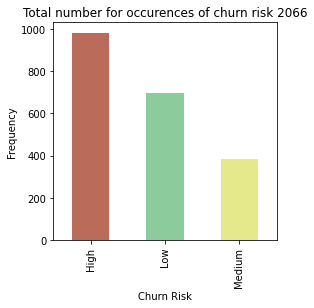

In [22]:
print( "Each category within the churnrisk column has the following count : ")
print(df_churn_pd.groupby(['CHURNRISK']).size())
#bar chart to show split of data
index = ['High','Medium','Low']
churn_plot = df_churn_pd['CHURNRISK'].value_counts(sort=True, ascending=False).plot(kind='bar',
            figsize=(4,4),title="Total number for occurences of churn risk " 
            + str(df_churn_pd['CHURNRISK'].count()), color=['#BB6B5A','#8CCB9B','#E5E88B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency");

<a id="prepare_data"></a>
## 3. Data preparation
[Top](#top)

Data preparation is a very important step in machine learning model building. This is because the model can perform well only when the data it is trained on is good and well prepared. Hence, this step consumes the bulk of a data scientist's time spent building models.

During this process, we identify categorical columns in the dataset. Categories need to be indexed, which means the string labels are converted to label indices. These label indices are encoded using One-hot encoding to a binary vector with at most a single value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features to use categorical features.


In [23]:
#remove columns that are not required
df_churn_pd = df_churn_pd.drop(['ID'], axis=1)

In [25]:
df_churn_pd.head().T

,0,1,2,3,4
CHURNRISK,Medium,Low,Low,High,High
GENDER,NaN,NaN,NaN,M,F
STATUS,M,M,S,M,S
CHILDREN,2,2,0,1,0
ESTINCOME,28766.9,91272.2,73228.3,64792.3,93322.1
HOMEOWNER,N,Y,N,N,Y
AGE,47,25,42,52,40
TOTALDOLLARVALUETRADED,6110.61,26992.7,22472.2,13051.3,29923
TOTALUNITSTRADED,58,13,28,36,8
LARGESTSINGLETRANSACTION,1527.65,13496.4,11236.1,6525.65,14961.5


Each category within the churnrisk column has the following count : 
GENDER
F    1315
M     748
dtype: int64


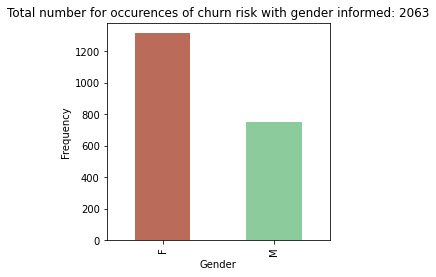

In [27]:
print( "Each category within the churnrisk column has the following count : ")
print(df_churn_pd.groupby(['GENDER']).size())
#bar chart to show split of data
index = ['High','Medium','Low']
churn_plot = df_churn_pd['GENDER'].value_counts(sort=True, ascending=False).plot(kind='bar',
            figsize=(4,4),title="Total number for occurences of churn risk with gender informed: " 
            + str(df_churn_pd['GENDER'].count()), color=['#BB6B5A','#8CCB9B','#E5E88B'])
churn_plot.set_xlabel("Gender")
churn_plot.set_ylabel("Frequency");


### [Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html)

Scikit-learn provides a method to fill empty values with something that would be applicable in its context. We used the <i><b> SimpleImputer <b></i> class that is provided by Sklearn and filled the missing values with the most frequent value in the column.

### [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [28]:
# Defining the categorical columns 
categoricalColumns = ['GENDER', 'STATUS', 'HOMEOWNER']

print("Categorical columns : " )
print(categoricalColumns)

# For The NaN (in this case only in GENDER) we will use the mode == most frequent
impute_categorical = SimpleImputer(strategy="most_frequent")

onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Categorical columns : 
['GENDER', 'STATUS', 'HOMEOWNER']


The numerical columns from the data set are identified, and StandardScaler is applied to each of the columns. This way, each value is subtracted with the mean of its column and divided by its standard deviation.<br>
### [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [35]:
# Defining the numerical columns 

# The original coding (not capturing CHILDREN)
# numericalColumns = df_churn_pd.select_dtypes(include=[np.float,np.int]).columns

numericalColumns = df_churn_pd.select_dtypes(include=[np.number]).columns

print("Numerical columns : " )
print(numericalColumns)


# Remember StandardScaler will do (x - x_bar / std. desv)
scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])


Numerical columns : 
Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
       'TOTALUNITSTRADED', 'LARGESTSINGLETRANSACTION',
       'SMALLESTSINGLETRANSACTION', 'PERCENTCHANGECALCULATION',
       'DAYSSINCELASTLOGIN', 'DAYSSINCELASTTRADE', 'NETREALIZEDGAINS_YTD',
       'NETREALIZEDLOSSES_YTD'],
      dtype='object')


The preprocessing techniques that are applied must be customized for each of the columns. Sklearn provides a library called the [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html?highlight=columntransformer#sklearn.compose.ColumnTransformer), which allows a sequence of these techniques to be applied to selective columns using a pipeline.

Only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped. By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through

In [36]:
preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, 
                                                                     categoricalColumns)],
                                            remainder="passthrough")
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),
                                                            ('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")



Machine learning algorithms cannot use simple text. We must convert the data from text to a number. Therefore, for each string that is a class we assign a label that is a number. For example, in the customer churn data set, the CHURNRISK output label is classified as high, medium, or low and is assigned labels 0, 1, or 2. We use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder) class provided by Sklearn for this.

In [37]:
# prepare data frame for splitting data into train and test datasets

features = []
features = df_churn_pd.drop(['CHURNRISK'], axis=1)

label_churn = pd.DataFrame(df_churn_pd, columns = ['CHURNRISK']) 
label_encoder = LabelEncoder()
label = df_churn_pd['CHURNRISK']

label = label_encoder.fit_transform(label)
print("Encoded value of Churnrisk after applying label encoder : " + str(label))


Encoded value of Churnrisk after applying label encoder : [2 1 1 ... 2 1 1]


#### These were some of the popular preprocessing steps that are applied on the data sets.

#### Look at [Data Processing in detail](https://developer.ibm.com/articles/data-preprocessing-in-detail/) for more information

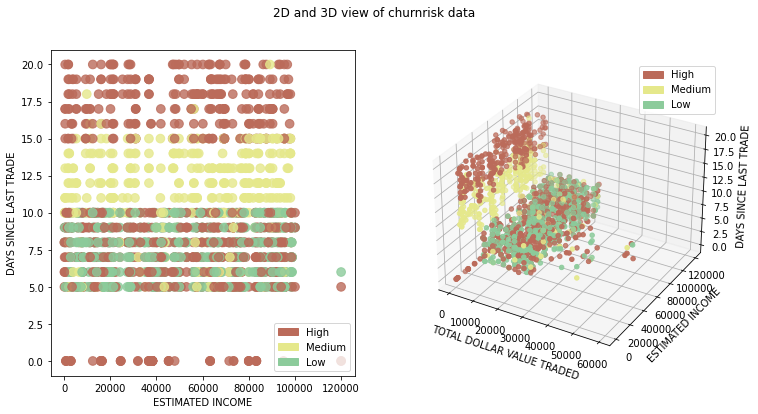

In [38]:
area = 75
x = df_churn_pd['ESTINCOME']
y = df_churn_pd['DAYSSINCELASTTRADE']
z = df_churn_pd['TOTALDOLLARVALUETRADED']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of churnrisk data')

# First subplot
ax = fig.add_subplot(1, 2,1)

ax.scatter(x, y, alpha=0.8, c=colormap(label), s= area)
ax.set_ylabel('DAYS SINCE LAST TRADE')
ax.set_xlabel('ESTIMATED INCOME')

plt.legend(handles=[pop_a,pop_b,pop_c])

# Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')

ax.scatter(z, x, y, c=colormap(label), marker='o')

ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
ax.set_ylabel('ESTIMATED INCOME')
ax.set_zlabel('DAYS SINCE LAST TRADE')

plt.legend(handles=[pop_a,pop_b,pop_c])

plt.show()


<a id="split_data"></a>
## 4. Split data into test and train
[Top](#top)

Scikit-learn provides in built API to split the original dataset into train and test datasets. random_state is set to a number to be able to reproduce the same data split combination through multiple runs. 

[Split arrays or matrices into random train and test subsets](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [39]:

X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))


Dimensions of datasets that will be used for training : Input features(1549, 15) Output label(1549,)
Dimensions of datasets that will be used for testing : Input features(517, 15) Output label(517,)


<a id="helper_methods"></a>
## 5. Helper methods for graph generation
[Top](#top)


In [40]:
def colormap(risk_list):
    cols=[]
    for l in risk_list:
        if l==0:
            cols.append('#BB6B5A')
        elif l==2:
            cols.append('#E5E88B')
        elif l==1:
            cols.append('#8CCB9B')
    return cols

def two_d_compare(y_test,y_pred,model_name):
    #y_pred = label_encoder.fit_transform(y_pred)
    #y_test = label_encoder.fit_transform(y_test)
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'], alpha=0.8, c=colormap(y_test))
    plt.title('Actual')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.subplot(122)
    plt.scatter(X_test['ESTINCOME'], X_test['DAYSSINCELASTTRADE'],alpha=0.8, c=colormap(y_pred))
    plt.title('Predicted')
    plt.legend(handles=[pop_a,pop_b,pop_c])

    plt.show()
    
x = X_test['TOTALDOLLARVALUETRADED']
y = X_test['ESTINCOME']
z = X_test['DAYSSINCELASTTRADE']

pop_a = mpatches.Patch(color='#BB6B5A', label='High')
pop_b = mpatches.Patch(color='#E5E88B', label='Medium')
pop_c = mpatches.Patch(color='#8CCB9B', label='Low')

def three_d_compare(y_test,y_pred,model_name):
    fig = plt.figure(figsize=(12,10))
    fig.suptitle('Actual vs Predicted (3D) data : ' +model_name + '. Accuracy : %.2f' % accuracy_score(y_test, y_pred))
    
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_test), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Actual')

    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x, y, z, c=colormap(y_pred), marker='o')
    ax.set_xlabel('TOTAL DOLLAR VALUE TRADED')
    ax.set_ylabel('ESTIMATED INCOME')
    ax.set_zlabel('DAYS SINCE LAST TRADE')
    plt.legend(handles=[pop_a,pop_b,pop_c])
    plt.title('Predicted')

    plt.show()
    

def model_metrics(y_test,y_pred):
    print("Decoded values of Churnrisk after applying inverse of label encoder : " + str(np.unique(y_pred)))

    skplt.metrics.plot_confusion_matrix(y_test,y_pred,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
    
    print("The classification report for the model : \n\n"+ classification_report(y_test, y_pred))


<a id="prepare_model"></a>
## 6. Prepare Random Forest classification model
[Top](#top)

We instantiate a decision-tree based classification algorithm, namely, RandomForestClassifier. Next we define a pipeline to chain together the various transformers and estimators defined during the data preparation step before. 
Scikit-learn provides APIs that make it easier to combine multiple algorithms into a single pipeline.

We fit the pipeline to training data and apply the trained model to transform test data and generate churn risk class prediction.

[Understanding Random Forest Classifier](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest Classifier"

randomForestClassifier = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)


Pipelines are a convenient way of designing your data processing in a machine learning flow. The following code example shows how pipelines are set up using sklearn.

Read more [Here](https://scikit-learn.org/stable/modules/classes.html?highlight=pipeline#module-sklearn.pipeline)

In [42]:
rfc_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', randomForestClassifier)])

<a id="train_model"></a>
## 7. Train Random Forest classification model
[Top](#top)

In [43]:
# Build models

rfc_model.fit(X_train,y_train)


Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GENDER', 'STATUS',
                                                   'HOMEOWNER']),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['CHILDREN', 'ESTINCOME', 'AGE', 'TOTALDOLLARVALUETRADED',
 

<a id="test_model"></a>
## 8. Test Random Forest classification model
[Top](#top)

In [45]:

y_pred_rfc = rfc_model.predict(X_test)
y_pred_rfc

array([0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 1,

<a id="evaluate_model"></a>
## 9. Evaluate Random Forest classification model
[Top](#top)

### Model results

In a supervised classification problem such as churn risk classification, we have a true output and a model-generated predicted output for each data point. For this reason, the results for each data point can be assigned to one of four categories:

1. True Positive (TP) - label is positive and prediction is also positive
2. True Negative (TN) - label is negative and prediction is also negative
3. False Positive (FP) - label is negative but prediction is positive
4. False Negative (FN) - label is positive but prediction is negative

These four numbers are the building blocks for most classifier evaluation metrics. A fundamental point when considering classifier evaluation is that pure accuracy (i.e. was the prediction correct or incorrect) is not generally a good metric. The reason for this is because a dataset may be highly unbalanced. For example, if a model is designed to predict fraud from a dataset where 95% of the data points are not fraud and 5% of the data points are fraud, then a naive classifier that predicts not fraud, regardless of input, will be 95% accurate. For this reason, metrics like precision and recall are typically used because they take into account the type of error. In most applications there is some desired balance between precision and recall, which can be captured by combining the two into a single metric, called the F-measure.



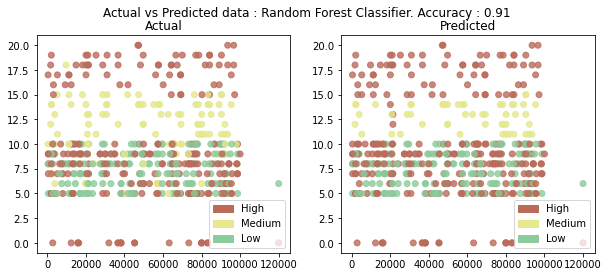

In [46]:
two_d_compare(y_test,y_pred_rfc,model_name)

#three_d_compare(y_test,y_pred_rfc,model_name)

### Confusion matrix 

In the graph below we have printed a confusion matrix and a self-explanotary classification report.

The confusion matrix shows that, 42 mediums were wrongly predicted as high, 2 mediums were wrongly predicted as low and 52 mediums were accurately predicted as mediums.

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


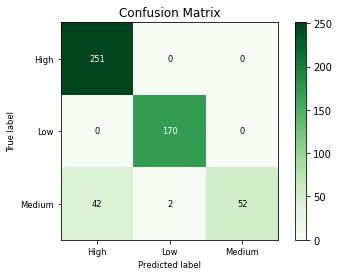

The classification report for the model : 

              precision    recall  f1-score   support

        High       0.86      1.00      0.92       251
         Low       0.99      1.00      0.99       170
      Medium       1.00      0.54      0.70        96

    accuracy                           0.91       517
   macro avg       0.95      0.85      0.87       517
weighted avg       0.93      0.91      0.91       517



In [47]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_rfc = label_encoder.inverse_transform(y_pred_rfc)
model_metrics(y_test,y_pred_rfc)

[Precision Recall Fscore support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)

[Understanding the Confusion Matrix](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826)

### Comparative study
In the bar chart below, we have compared the random forest classification algorithm output classes against the actual values. 

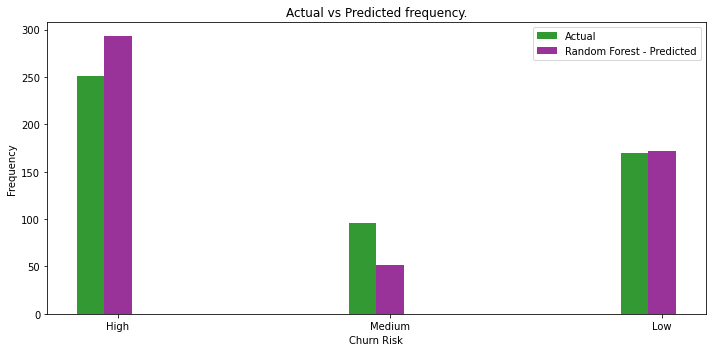

In [48]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects6 = plt.bar(index + bar_width, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()

<a id="model_knn"></a>
## 10. Build K-Nearest classification model
[Top](#top)

K number of nearest points around the data point to be predicted are taken into consideration. These K points at this time, already belong to a class. The data point under consideration, is said to belong to the class with which most number of points from these k points belong to. 

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "K-Nearest Neighbor Classifier"

knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)

knn_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('classifier', knnClassifier)]) 

knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)


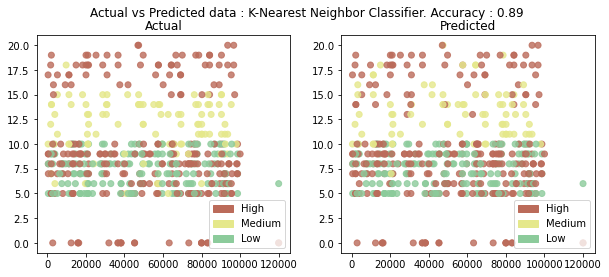

In [50]:
y_test = label_encoder.transform(y_test)
two_d_compare(y_test,y_pred_knn,model_name)

Decoded values of Churnrisk after applying inverse of label encoder : ['High' 'Low' 'Medium']


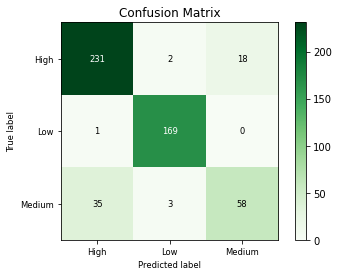

The classification report for the model : 

              precision    recall  f1-score   support

        High       0.87      0.92      0.89       251
         Low       0.97      0.99      0.98       170
      Medium       0.76      0.60      0.67        96

    accuracy                           0.89       517
   macro avg       0.87      0.84      0.85       517
weighted avg       0.88      0.89      0.88       517



In [51]:
y_test = label_encoder.inverse_transform(y_test)
y_pred_knn = label_encoder.inverse_transform(y_pred_knn)
model_metrics(y_test,y_pred_knn)

<a id="compare_classification"></a>
## 11. Comparative study of both classification algorithms. 
[Top](#top)


 

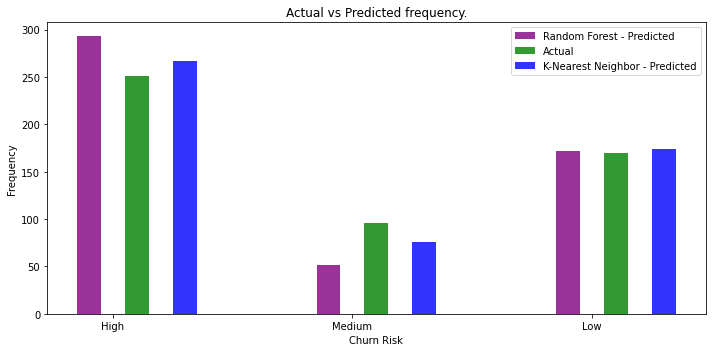

In [56]:
uniqueValues, occurCount = np.unique(y_test, return_counts=True)
frequency_actual = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_rfc, return_counts=True)
frequency_predicted_rfc = (occurCount[0],occurCount[2],occurCount[1])

uniqueValues, occurCount = np.unique(y_pred_knn, return_counts=True)
frequency_predicted_knn = (occurCount[0],occurCount[2],occurCount[1])

n_groups = 3
fig, ax = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8


rects6 = plt.bar(index, frequency_predicted_rfc, bar_width,
alpha=opacity,
color='purple',
label='Random Forest - Predicted')

rects1 = plt.bar(index + bar_width*2, frequency_actual, bar_width,
alpha=opacity,
color='g',
label='Actual')

rects4 = plt.bar(index + bar_width*4, frequency_predicted_knn, bar_width,
alpha=opacity,
color='b',
label='K-Nearest Neighbor - Predicted')



plt.xlabel('Churn Risk')
plt.ylabel('Frequency')
plt.title('Actual vs Predicted frequency.')
plt.xticks(index + bar_width, ('High', 'Medium', 'Low'))
plt.legend()

plt.tight_layout()
plt.show()

Until evaluation provides satisfactory scores, you would repeat the data preprocessing through evaluating steps by tuning what are called the hyperparameters.

[Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### For a comparative study of some of the current most popular algorithms Please refer to this [tutorial](https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/)

<p><font size=-1 color=gray>
&copy; Eduardo Gil González-Madroño  |  profesorDATA.com  | All Rights Reserved.
<p>
Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file
except in compliance with the License. You may obtain a copy of the License at
https://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, software distributed under the
License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either
express or implied. See the License for the specific language governing permissions and
limitations under the License.
</font></p>